# Data Analysis Interview Challenge
This is your chance to wow us with creative and rigorous solutions! Please include your code at
the end of your submission, or in a separate file. We also accept incomplete solutions.


## Part 1 - Exploratory Data Analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [2]:
logins_df = pd.read_json('logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
# get latest time in logins
print(max(logins_df.login_time))

1970-04-13 18:57:38


In [5]:
# Set the index to 'login_time' for resampling
logins_df.set_index('login_time', inplace=True)

In [6]:
# Aggregate login counts in 15-minute intervals
login_counts = logins_df.resample('15T').size()

# Reset the index to make the data easier to plot
login_counts = login_counts.reset_index()
login_counts.columns = ['time', 'count']

# Display the first few rows of the aggregated data
login_counts.head()

,time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


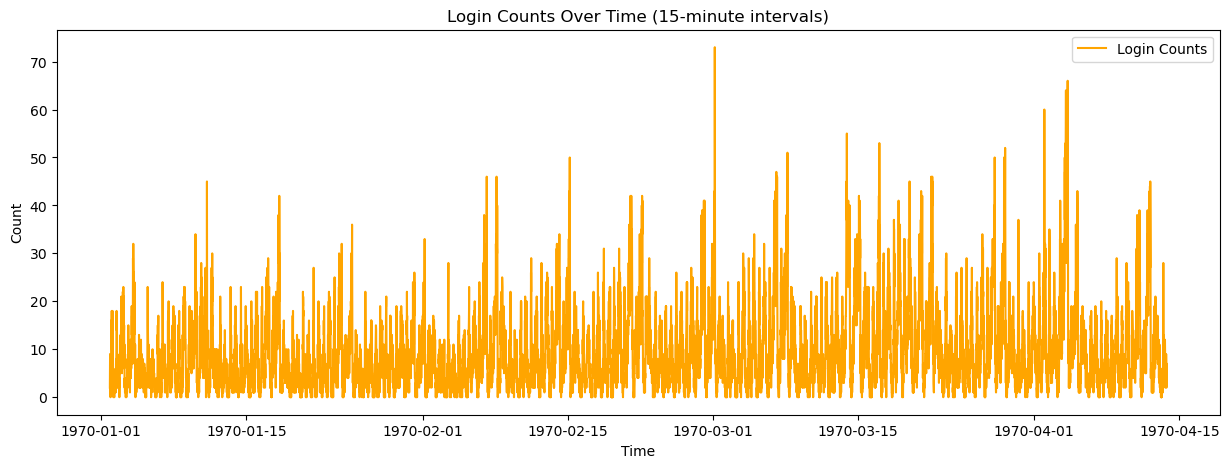

In [7]:
# Plotting the entire time series
plt.figure(figsize=(15, 5))
plt.plot(login_counts['time'], login_counts['count'], label='Login Counts', color='orange')
plt.title('Login Counts Over Time (15-minute intervals)')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

The above plot indicates that there are likely weekly cyclical patterns in the dataset. Let's explore that more explictly by examining the first full week of 1970.

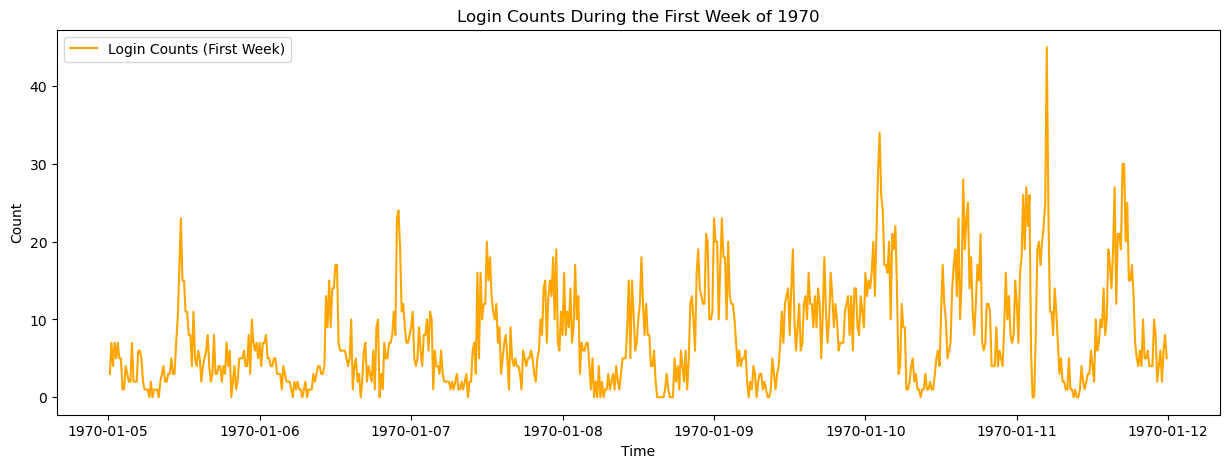

In [8]:
# Focus on the first week to observe finer patterns
plt.figure(figsize=(15, 5))
one_week_data = login_counts[(login_counts['time'] > "1970-01-05") & (login_counts['time'] < "1970-01-12")]
plt.plot(one_week_data['time'], one_week_data['count'], label='Login Counts (First Week)', color='orange')
plt.title('Login Counts During the First Week of 1970')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

There is indeed a weekly cycle with the highest peaks on the weekends with cylical patterns each day throughout the work week and down times late at night and early in the morning. 

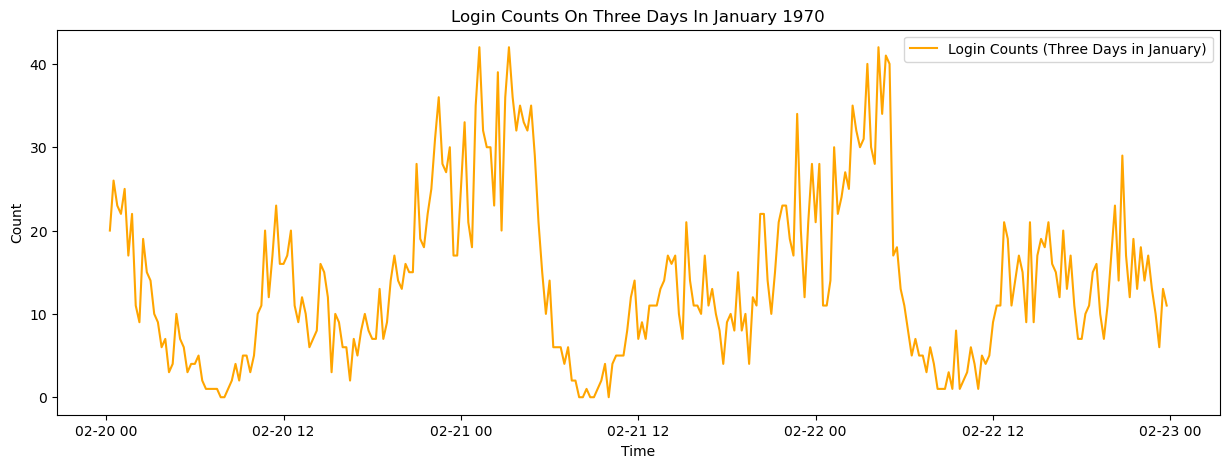

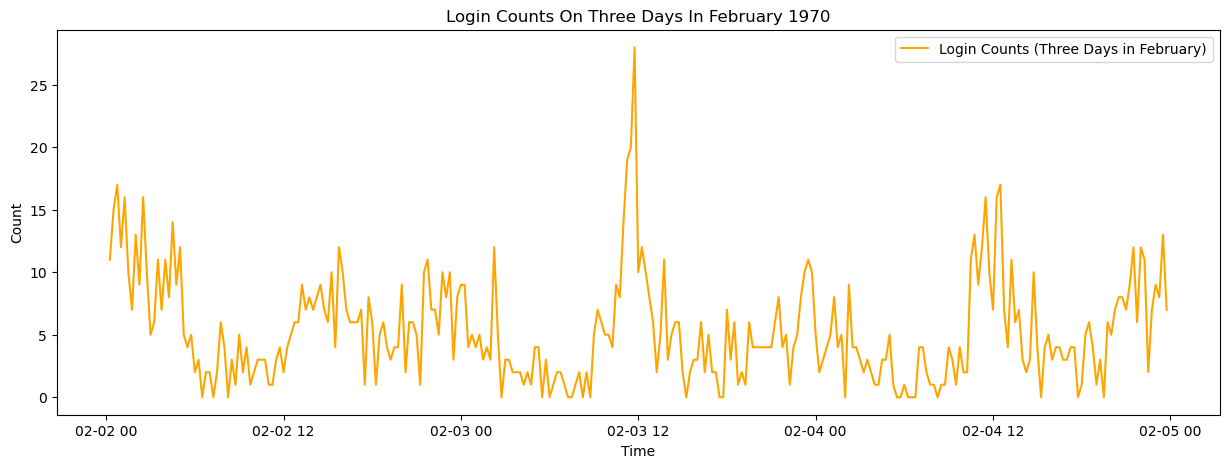

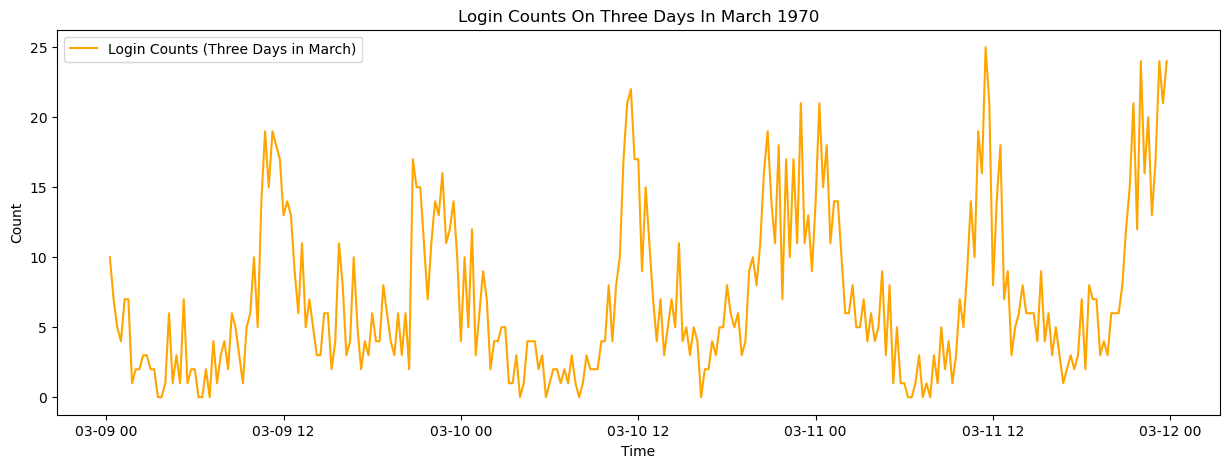

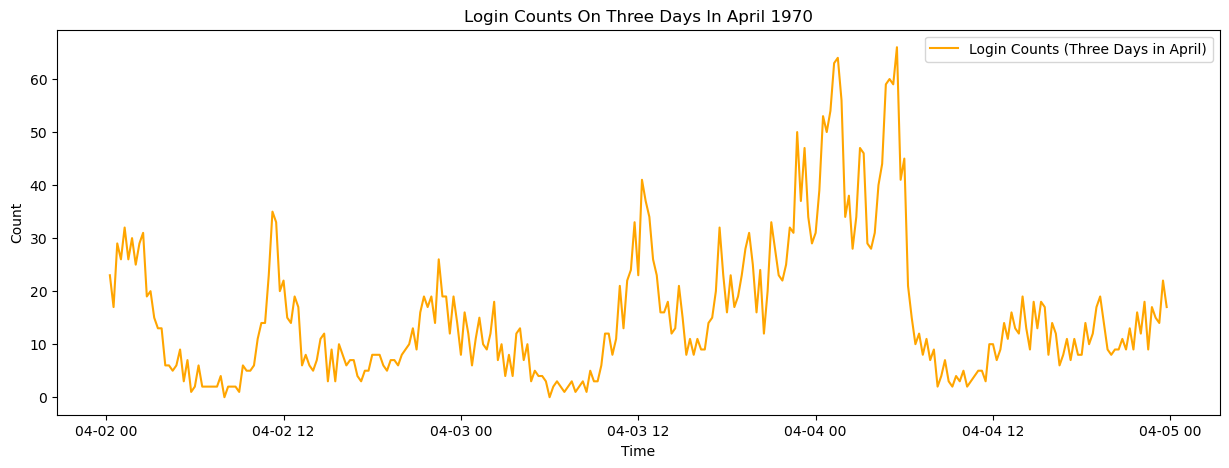

In [9]:
# Focus on 3 days in Jan
plt.figure(figsize=(15, 5))
three_day_0 = login_counts[(login_counts['time'] > "1970-02-20") & (login_counts['time'] < "1970-02-23")]
plt.plot(three_day_0['time'], three_day_0['count'], label='Login Counts (Three Days in January)', color='orange')
plt.title('Login Counts On Three Days In January 1970')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

# Focus on 3 days in Feb
plt.figure(figsize=(15, 5))
three_day_1 = login_counts[(login_counts['time'] > "1970-02-02") & (login_counts['time'] < "1970-02-05")]
plt.plot(three_day_1['time'], three_day_1['count'], label='Login Counts (Three Days in February)', color='orange')
plt.title('Login Counts On Three Days In February 1970')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

# Focus on 3 days in Mar
plt.figure(figsize=(15, 5))
three_day_2 = login_counts[(login_counts['time'] > "1970-03-09") & (login_counts['time'] < "1970-03-12")]
plt.plot(three_day_2['time'], three_day_2['count'], label='Login Counts (Three Days in March)', color='orange')
plt.title('Login Counts On Three Days In March 1970')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

# Focus on 3 days in Apr
plt.figure(figsize=(15, 5))
three_day_3 = login_counts[(login_counts['time'] > "1970-04-02") & (login_counts['time'] < "1970-04-05")]
plt.plot(three_day_3['time'], three_day_3['count'], label='Login Counts (Three Days in April)', color='orange')
plt.title('Login Counts On Three Days In April 1970')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

Four vizualizations above for 3-day periods in January, February, March, April of 1970. Combined with the other plots it becomes clear that logins follow a weekly cyclical pattern, peaking on weekends. Additionally, logins follow a cyclical pattern on a daily basis with peaks in the hours before noon and around midnight.

## Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

Ad 1) Since Ultimate is operating a buisiness, the ultimate measure of success will be profitiablity. Since the issue they are seeking to ameliorate is that of losing revenue due to some drivers in one city being available but not having enough work while there is simulatenously a shortage of drivers on the other side of the bridge. Since some drivers likely already operate in both cities (following the customers), a good measure of success for this initiative would be seeing how the number of Gotham or Metropolis exclusive drivers changes as more begin taking trips in the other city. This could perhaps be combined with metrics like average wait times, customer satisfaction, and ultimately profitablity.


2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
observation
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do
not need this information to answer Part 2.

Ad 2) 

a) How to Implement the Experiment:

Control Group: Complete and quality data is collected for a few months while Ultimate prepares to roll out the toll-reimbursment program. This allows them to pin down numbers for features such as ridership, driver locations, costs, etc. while the drivers are responsible for their own tolls.

b) What Statistical Test:
A hypothesis test can be used with the null hypothesis that there will not be an increase in drivers crossing the bridge to do trips in the other city. 

c) Interpretation and Caveats: 

Interpretation: 
- Significant Increase: If there’s a statistically significant increase in drivers crossing the bridge to work in the other city  compared to the control, it suggests the toll reimbursement is effective.
- No Change or Decrease: If there's no significant change, or a decrease, it may indicate other barriers to drivers working in multiple cities exist or that the toll cost was not a primary factor.
- Recommendations: Depending on the outcomes, either continue the toll reimbursement moving forward, adjust the experiment parameters, or explore other incentives.


Caveats: 
- Consider external factors such as seasonal changes, economic shifts, or infrastructure issues that could influence driving patterns independently of the toll reimbursement.
- Ensure the data collected is accurate and representative of the drivers’ complete activity profiles.

## Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

In [10]:
riders_df = pd.read_json('ultimate_data_challenge.json')
riders_df.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [11]:
# Check for missing values
print(riders_df.isnull().sum())

# Impute missing values or drop them
riders_df['avg_rating_of_driver'] = riders_df['avg_rating_of_driver'].fillna(riders_df['avg_rating_of_driver'].mean())

# Convert dates from strings to datetime objects
riders_df['signup_date'] = pd.to_datetime(riders_df['signup_date'])
riders_df['last_trip_date'] = pd.to_datetime(riders_df['last_trip_date'])

# Define retention
latest_date = riders_df['last_trip_date'].max()
riders_df['retained'] = riders_df['last_trip_date'] >= latest_date - pd.Timedelta(days=30)

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


Retention Rate: 0.38


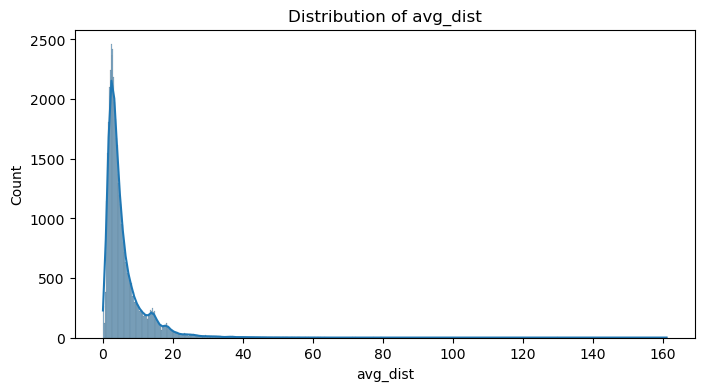

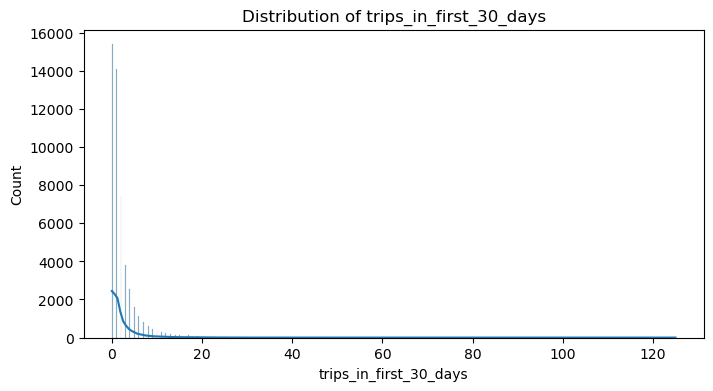

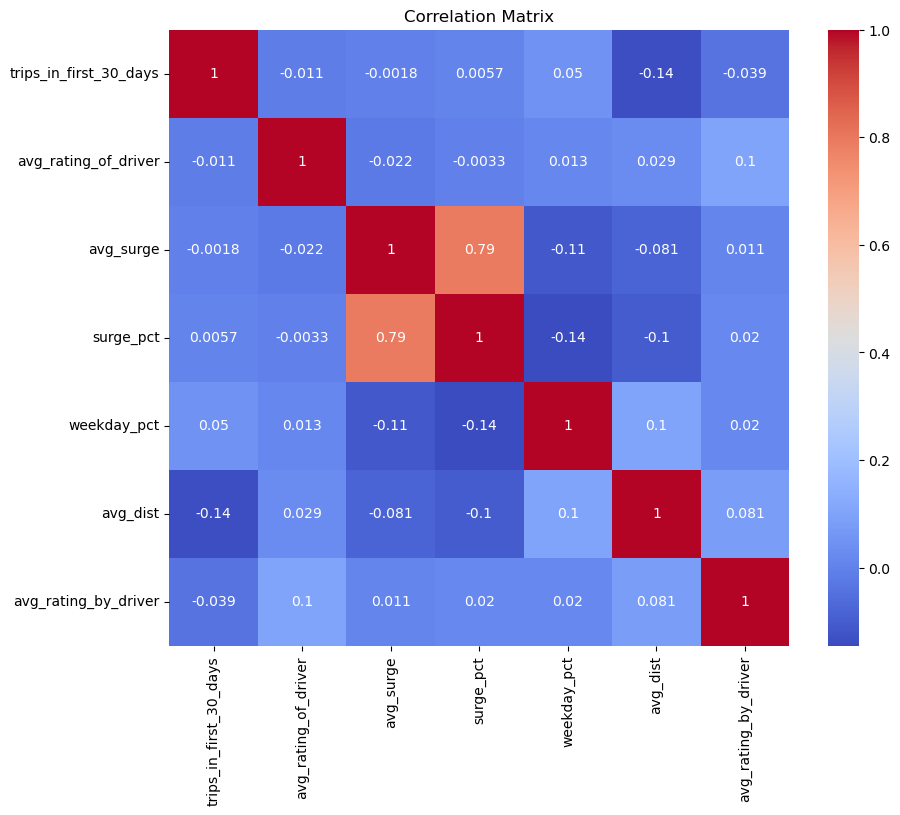

In [12]:
# Retention rate
retention_rate = riders_df['retained'].mean()
print(f'Retention Rate: {retention_rate:.2f}')

# Plot distributions of numerical features
plt.figure(figsize=(8,4))
sns.histplot(riders_df['avg_dist'], kde=True)
plt.title('Distribution of avg_dist')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(riders_df['trips_in_first_30_days'], kde=True)
plt.title(f'Distribution of trips_in_first_30_days')
plt.show()


# Correlation matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(riders_df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Encode categorical variables
riders_df = pd.get_dummies(riders_df, columns=['city', 'phone'], drop_first=True)

# Datetime features
riders_df['days_since_signup'] = (latest_date - riders_df['signup_date']).dt.days

# Drop original date columns
riders_df = riders_df.drop(['signup_date', 'last_trip_date'], axis=1)

riders_df = riders_df.dropna()

In [14]:
# Split data into features and target
X = riders_df.drop('retained', axis=1)
y = riders_df['retained']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

       False       0.80      0.84      0.82      6244
        True       0.71      0.65      0.68      3716

    accuracy                           0.77      9960
   macro avg       0.76      0.75      0.75      9960
weighted avg       0.77      0.77      0.77      9960

ROC AUC Score: 0.75


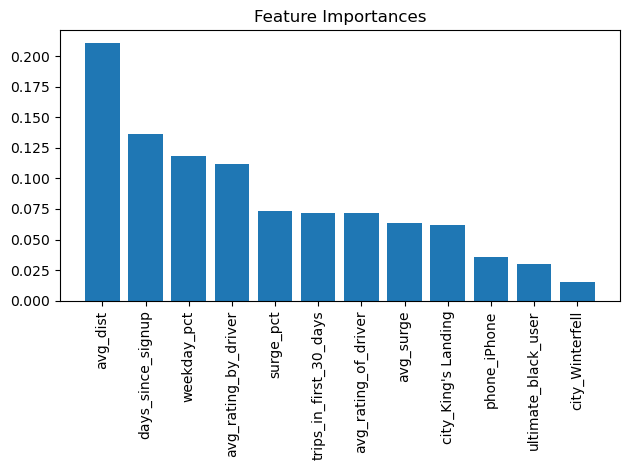

In [15]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Recommendations based on the model can be developed here

Of the features analyzed, the ones most impactful on rider retention are average distance of rides, days since signup, and percentage of trips taken on a weekday. The days_since_signup make sense as anyone who has had an account for longer and is returning to use it is more likely to be an adopted user. As for the distance and weekday portions these could likely be many of the same users and thus the weekday retention should be the main target for Ultimate. This is because the weekday users likely rely on Ultimate to get to and from work, and thus are more likely to adopt.